In [ ]:
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
data = pd.read_csv("column_3C.dat", header= None, sep = ' ')
# pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius, grade of spondylolisthesis, 
data.columns=['PI', 'PT', 'LLA', 'SS', 'PR', 'GoS','Res']

In [ ]:
print(data)

        PI     PT    LLA     SS      PR    GoS Res
0    63.03  22.55  39.61  40.48   98.67  -0.25  DH
1    39.06  10.06  25.02  29.00  114.41   4.56  DH
2    68.83  22.22  50.09  46.61  105.99  -3.53  DH
3    69.30  24.65  44.31  44.64  101.87  11.21  DH
4    49.71   9.65  28.32  40.06  108.17   7.92  DH
..     ...    ...    ...    ...     ...    ...  ..
305  47.90  13.62  36.00  34.29  117.45  -4.25  NO
306  53.94  20.72  29.22  33.22  114.37  -0.42  NO
307  61.45  22.69  46.17  38.75  125.67  -2.71  NO
308  45.25   8.69  41.58  36.56  118.55   0.21  NO
309  33.84   5.07  36.64  28.77  123.95  -0.20  NO

[310 rows x 7 columns]


In [ ]:
data_labels = data.iloc[:,-1]
le = preprocessing.LabelEncoder()
label = le.fit_transform(data_labels)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
dftrain, dftest = train_test_split(data, test_size=0.3, random_state = 1, stratify = label)
print(dftrain)
print(dftest)

        PI     PT    LLA     SS      PR     GoS Res
273  35.88   1.11  43.46  34.77  126.92   -1.63  NO
128  90.51  28.27  69.81  62.24  100.89   58.82  SL
270  51.31   8.88  57.00  42.44  126.47   -2.14  NO
18   38.70  13.44  31.00  25.25  123.16    1.43  DH
131  69.78  13.78  58.00  56.00  118.93   17.91  SL
..     ...    ...    ...    ...     ...     ...  ..
203  73.64   9.71  63.00  63.92   98.73   26.98  SL
198  74.85  13.91  62.69  60.95  115.21   33.17  SL
159  64.27  12.51  68.70  51.77   95.25   39.41  SL
257  50.16  -2.97  42.00  53.13  131.80   -8.29  NO
192  74.47  33.28  66.94  41.19  146.47  124.98  SL

[217 rows x 7 columns]
        PI     PT    LLA     SS      PR    GoS Res
135  77.12  30.35  77.48  46.77  110.61  82.09  SL
225  59.73   7.72  55.34  52.00  125.17   3.24  NO
297  45.58  18.76  33.77  26.82  116.80   3.13  NO
123  65.67  10.54  56.49  55.12  109.16  53.93  SL
6    53.43  15.86  37.17  37.57  120.57   5.99  DH
..     ...    ...    ...    ...     ...    ...

In [ ]:
avg_train = 0
avg_test = 0
for i in range(0,1000):
    dftrain, dftest = train_test_split(data, test_size=0.3, random_state = i, stratify = label)
    clf_gini = tree.DecisionTreeClassifier(random_state = 0, max_depth =3 , criterion = 'gini', min_samples_leaf = 1)
    clf_gini = clf_gini.fit(dftrain.iloc[:,0:6], dftrain.iloc[:,-1])
    # dot_data_gini = tree.export_graphviz(clf_gini, out_file=None, 
    # feature_names=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis'],
    # class_names=['DH','NO', 'SL'],
    # filled=True, rounded=True,
    # special_characters=True)
    # graph_gini = graphviz.Source(dot_data_gini) 
    # graph_gini.render('Asg1_gini', view=False)
    prediction_train_gini = clf_gini.predict(dftrain.iloc[:,0:6])
    prediction_test_gini = clf_gini.predict(dftest.iloc[:,0:6])
    avg_train += accuracy_score(dftrain.iloc[:,-1], prediction_train_gini)
    avg_test += accuracy_score(dftest.iloc[:,-1], prediction_test_gini)
avg_train /= 1000
avg_test /= 1000
print('accuracy score of train data:', avg_train)
print('accuracy score of test data:', avg_test)

accuracy score of train data: 0.8741336405529904
accuracy score of test data: 0.8039999999999985


In [ ]:
prediction_train_gini = clf_gini.predict(dftrain.iloc[:,0:6])
prediction_test_gini = clf_gini.predict(dftest.iloc[:,0:6])
print('accuracy score of train data:', accuracy_score(dftrain.iloc[:,-1], prediction_train_gini))
print('accuracy score of test data:', accuracy_score(dftest.iloc[:,-1], prediction_test_gini))
print('error rate of train data:', 1 - accuracy_score(dftrain.iloc[:,-1], prediction_train_gini))
print('error rate of test data:', 1 - accuracy_score(dftest.iloc[:,-1], prediction_test_gini))

accuracy score of train data: 0.9032258064516129
accuracy score of test data: 0.8387096774193549
error rate of train data: 0.09677419354838712
error rate of test data: 0.16129032258064513


In [ ]:
clf_entropy = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3, criterion='gini', min_samples_leaf = 1)
clf_entropy = clf_entropy.fit(dftrain.iloc[:,0:6], dftrain.iloc[:,-1])
dot_data_entropy = tree.export_graphviz(clf_entropy, out_file=None, 
feature_names=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis'],
class_names=['DH','NO', 'SL'],
filled=True, rounded=True,
 special_characters=True)
graph_entropy = graphviz.Source(dot_data_entropy)
graph_entropy.render('Asg1_entropy', view=False)

'Asg1_entropy.pdf'

In [ ]:
prediction_train_entropy = clf_entropy.predict(dftrain.iloc[:,0:6])
prediction_test_entropy = clf_entropy.predict(dftest.iloc[:,0:6])
print('accuracy score of train data:', accuracy_score(dftrain.iloc[:,-1], prediction_train_entropy))
print('accuracy score of test data:', accuracy_score(dftest.iloc[:,-1], prediction_test_entropy))
# print('error rate of train data:', 1 - accuracy_score(dftrain.iloc[:,-1], prediction_train_entropy))
# print('error rate of test data:', 1 - accuracy_score(dftest.iloc[:,-1], prediction_test_entropy))
wrong = []
for i in range(0, len(dftest.iloc[:,-1])):
    if prediction_test_entropy[i] != dftest.iloc[i,-1]:
        print(prediction_test_entropy[i], dftest.iloc[i,-1])
        wrong.append(dftest.iloc[i,0:6])
print(clf_entropy.decision_path(wrong).todense())

accuracy score of train data: 0.9078341013824884
accuracy score of test data: 0.8064516129032258
DH NO
NO DH
NO DH
DH NO
DH NO
DH NO
DH NO
NO DH
DH NO
NO SL
DH NO
NO DH
NO DH
NO DH
NO DH
NO DH
DH SL
NO DH
[[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 1 0 1 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 1 0 0 0 0 0 0 0]]


[[ 9  9  0]
 [ 7 23  0]
 [ 1  1 43]]


Text(89.18, 0.5, 'true label')

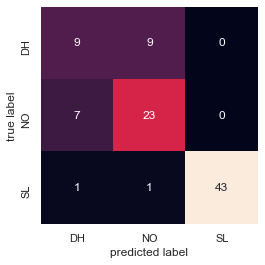

In [ ]:
print(confusion_matrix(dftest.iloc[:,-1], prediction_test_entropy))
mat = confusion_matrix(dftest.iloc[:,-1], prediction_test_entropy)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['DH','NO', 'SL'],
            yticklabels=['DH','NO', 'SL'])
plt.xlabel('predicted label')
plt.ylabel('true label')

In [ ]:
print(clf_entropy.tree_.value)

[[[ 42.  70. 105.]]

 [[ 42.  67.   4.]]

 [[ 29.  14.   3.]]

 [[ 26.   3.   0.]]

 [[ 19.   0.   0.]]

 [[  7.   3.   0.]]

 [[  3.  11.   3.]]

 [[  3.  11.   1.]]

 [[  0.   0.   2.]]

 [[ 13.  53.   1.]]

 [[ 11.   6.   0.]]

 [[ 11.   3.   0.]]

 [[  0.   3.   0.]]

 [[  2.  47.   1.]]

 [[  2.  47.   0.]]

 [[  0.   0.   1.]]

 [[  0.   3. 101.]]

 [[  0.   1.   2.]]

 [[  0.   1.   0.]]

 [[  0.   0.   2.]]

 [[  0.   2.  99.]]

 [[  0.   2.  21.]]

 [[  0.   1.  21.]]

 [[  0.   1.   0.]]

 [[  0.   0.  78.]]]


In [ ]:
print(clf_entropy.decision_path(dftest.iloc[:,0:6]).todense())

[[1 0 0 ... 0 0 1]
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 0 0 ... 1 0 0]]
